<a href="https://colab.research.google.com/github/KeerthiVasan-ai/deep-learning-tools-lab/blob/main/2_Data_Augumentation_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [36]:
train_ds,test_ds = cifar10.load_data()
train_ds = tf.data.Dataset.from_tensor_slices(train_ds)

In [41]:
type(train_ds.take(4))

tensorflow.python.data.ops.take_op._TakeDataset

In [37]:
def show_images(images):
  n = len(images)
  for index,image in enumerate(images):
    plt.subplot(1,n,index+1)
    plt.imshow(image)
    plt.axis("off")
  plt.show()

In [38]:
IMG_SIZE = 32
augumentation_layer = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE,IMG_SIZE),
    tf.keras.layers.Rescaling(1/256),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(factor=0.2),
    tf.keras.layers.RandomContrast(factor=(.2,.9))
])

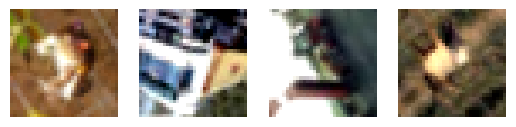

In [40]:
augumented_images = train_ds.take(4).map(
    lambda x,y : augumentation_layer(x)
)
show_images(augumented_images)

In [51]:
def prepare(images):
  images = images.map(
      lambda x,y : (augumentation_layer(x),y),num_parallel_calls=tf.data.AUTOTUNE
  )
  return images.prefetch(buffer_size = tf.data.AUTOTUNE)

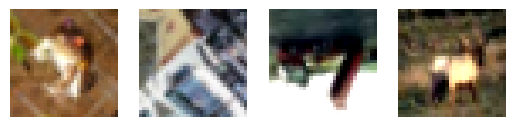

In [52]:
processed_images = prepare(train_ds.take(4))
show_images(processed_images.map(
    lambda x,y : x
))

## Using tf.image

In [48]:
image,label = next(iter(train_ds))

In [62]:
def resize_and_rescale(img):
  img = tf.cast(img,tf.float32)
  img = tf.image.resize(img,(32,32))
  return img / 255
def augumented_layer(image,label):
  image = resize_and_rescale(image)
  image = tf.image.flip_left_right(image)
  image = tf.image.flip_up_down(image)
  image = tf.image.adjust_brightness(image,-.2)
  image = tf.image.adjust_contrast(image,2)
  image = tf.image.adjust_saturation(image,2)
  return image,label

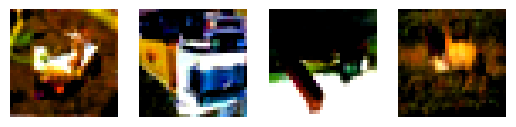

In [63]:
augumented_image = train_ds.take(4).map(
    lambda x,y : augumented_layer(x,y)
)
show_images(
    augumented_image.map(
        lambda x,y:x
    )
)